**MILESTONE 1**
**Week 1: Project Setup & Dataset Understanding**

**o Load data, explore feature distribution, map locations.**

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('/content/earthquakes_2023_global.csv')

In [11]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [12]:
df.shape

(26642, 22)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

**Week 2: Preprocessing & Feature Engineering**

**o Handle missing values, normalize and create new features.**

In [14]:
## Finding Missing Values
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,1415
gap,1417
dmin,1866
rms,0


In [15]:
df['type'].unique()

array(['earthquake', 'mining explosion', 'quarry blast', 'ice quake',
       'explosion', 'Landslide', 'volcanic eruption', 'landslide'],
      dtype=object)

In [16]:
### So basically our output feature Is Type of event that is occured

In [17]:
X = df.drop(['type', 'id' , 'time', 'updated', 'place' , 'mag'] , axis=1)
y = df['mag']

In [18]:
## Now What we are going to do is making an ML Pipeline so that the process of EDA and Feature Engineering can be Automated to a certain extent

In [19]:
categorical_columns = X.select_dtypes(include=['string' , 'object']).columns
categorical_columns

Index(['magType', 'net', 'status', 'locationSource', 'magSource'], dtype='object')

In [20]:
numerical_columns = X.select_dtypes(include=['int64' , 'float64']).columns
numerical_columns

Index(['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magNst'],
      dtype='object')

In [21]:
### Now since we have maked sepeerate columns for NUmerical and Categorical data we can now make a pipeline for them

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
cat_pipeline = Pipeline(
    steps=[
        ('imputer' , SimpleImputer(strategy='most_frequent')),
        ('encoder' , OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [24]:
num_pipeline = Pipeline(
    steps=[
        ('imputer' , SimpleImputer(strategy='median')),
        ('scaler' , StandardScaler())
    ]
)

In [25]:
## After making the Pipeline we combine them using ColumnTransformer

preprocessor = ColumnTransformer([
    ('num_pipeline' , num_pipeline ,numerical_columns),
    ('cat_pipeline', cat_pipeline , categorical_columns)
])

In [26]:
## Now we Split our Data into training and testing data

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=42)

In [27]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

**MILESTONE 2**

**Week 3: Baseline Model Training**

**o Logistic Regression, Decision Tree**

**o Basic accuracy/MAE analysis.**

In [29]:
from sklearn.metrics import r2_score ,mean_squared_error , mean_absolute_error

In [30]:
models = {
    'LinearRegression' : LinearRegression(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'SVR' : SVR()
}

In [31]:
def evaluate_model(X_train , y_train , X_test , y_test):
    score1 = {}
    score2 = {}
    score3 = {}

    for i in range(len(models)):
        model = list(models.values())[i]

        model.fit(X_train , y_train)

        y_test_pred = model.predict(X_test)


        test_model_score2 = mean_squared_error(y_test_pred , y_test)
        score2[list(models.keys())[i]] = test_model_score2

    return score2

In [32]:
evaluate_model(X_train , y_train , X_test , y_test)

{'LinearRegression': 0.07316753951360858,
 'RandomForestRegressor': 0.04783580754526546,
 'DecisionTreeRegressor': 0.08922288697115013,
 'SVR': 0.05321652782026575}

In [33]:
## Using RandomForestRegressor for our model...

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
reg = RandomForestRegressor()

**Week 4: Advanced Model Training**

**o Random Forest, Gradient Boosting**

**o Cross-validation, hyperparameter tuning.**

In [36]:
parameters = {
        'n_estimators': range(5,16),
        'max_features': ['sqrt', 'log2', None],
        'max_depth': range(1 , 6),
        'min_samples_split': range(1 , 6)
    }

In [37]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
cv = GridSearchCV(reg , param_grid = parameters , cv=5 , scoring='neg_mean_squared_error' ,verbose=3)

In [38]:
cv.fit(X_train , y_train)

Fitting 5 folds for each of 825 candidates, totalling 4125 fits
[CV 1/5] END max_depth=1, max_features=sqrt, min_samples_split=1, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, min_samples_split=1, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, min_samples_split=1, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, min_samples_split=1, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, min_samples_split=1, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, min_samples_split=1, n_estimators=6;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, min_samples_split=1, n_estimators=6;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, min_samples_split=1, n_estimators=6;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=s

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
825 fits failed out of a total of 4125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
825 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 6),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': range(1, 6),
                         'n_estimators': range(5, 16)},
             scoring='neg_mean_squared_error', verbose=3)

In [39]:
y_pred = cv.predict(X_test)

In [40]:
mse = mean_squared_error(y_pred , y_test)
print(mse)

0.07644937374430405


In [41]:
mae = mean_absolute_error(y_pred , y_test)
print(mae)

0.20706664037406666


In [42]:
r2 = r2_score(y_pred , y_test)
print(r2)

0.8593450273377925


In [43]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_pred , y_test)
print(rmse)

0.2764947987653729


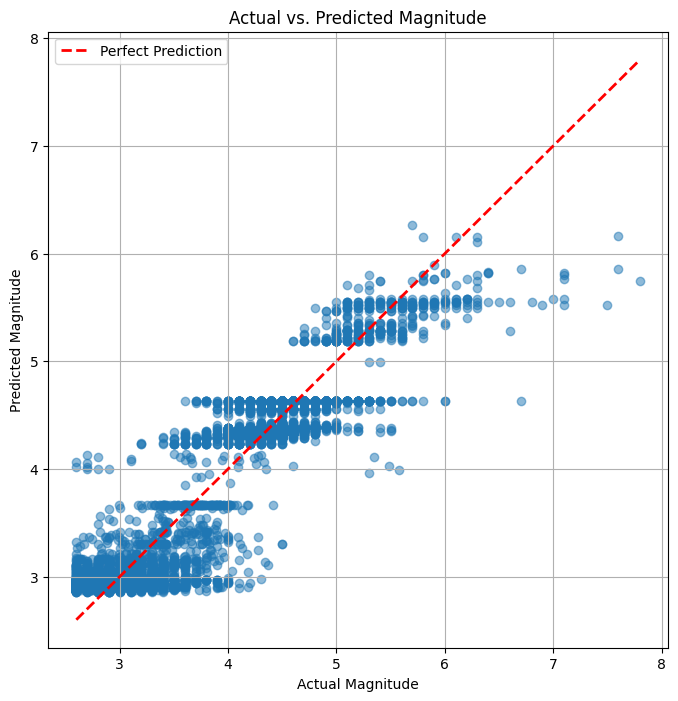

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)

line_min = min(np.min(y_test), np.min(y_pred))
line_max = max(np.max(y_test), np.max(y_pred))
plt.plot([line_min, line_max], [line_min, line_max], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs. Predicted Magnitude')
plt.legend()
plt.grid(True)
plt.show()

**MILESTONE 3**

**Week 5: Evaluation & Explainability**

**o MAE/MSE plots**

**o Feature importance, SHAP values.**

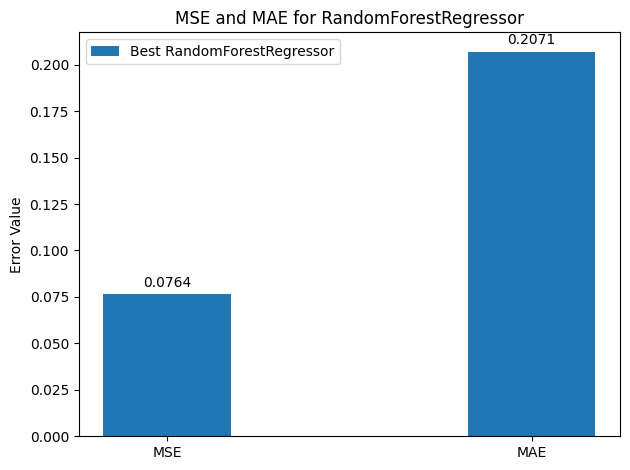

In [74]:
best_model = cv.best_estimator_
y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

metrics = ['MSE', 'MAE']
values = [mse_best, mae_best]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, values, width, label='Best RandomForestRegressor')

ax.set_ylabel('Error Value')
ax.set_title('MSE and MAE for RandomForestRegressor')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()
plt.show()

In [69]:
import shap


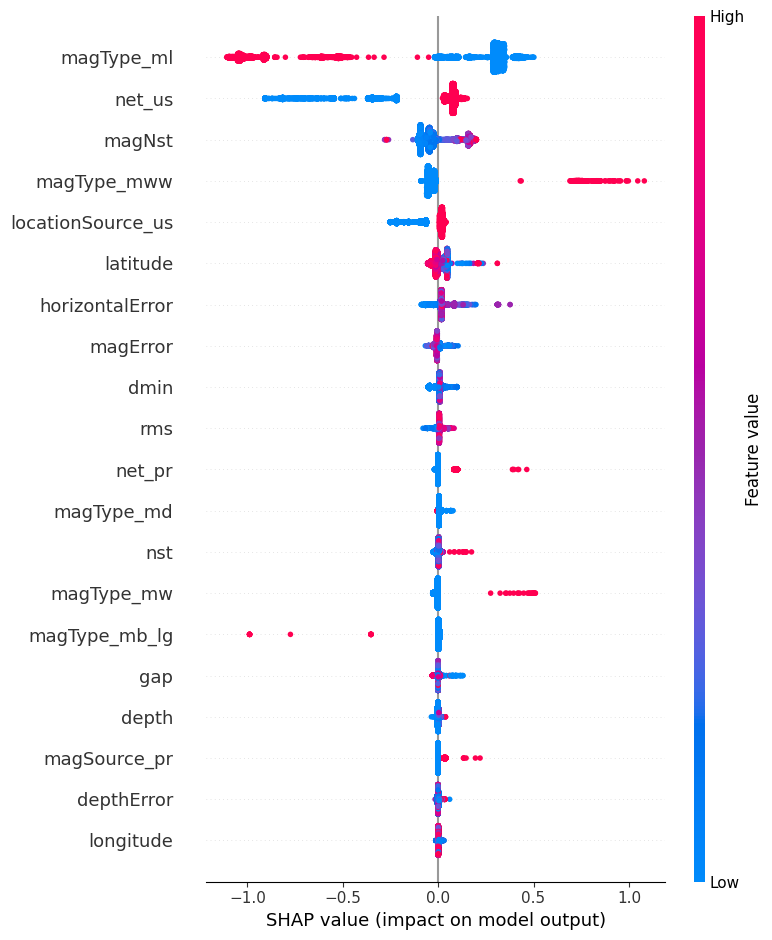

In [75]:
explainer = shap.TreeExplainer(best_model)

if hasattr(X_test, 'toarray'):
    X_test_dense = X_test.toarray()
else:
    X_test_dense = X_test
shap_values = explainer.shap_values(X_test_dense)
shap.summary_plot(shap_values, X_test_dense, feature_names=all_feature_names)